<a href="https://colab.research.google.com/github/AlexandraLJones/FIRE-CloudComputing/blob/main/Ryan_FINAL_FIRE398_Semester_2_Convective_Cores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FIRE 398 Semester 2 Final Notebook 
##Investigating Convective Cores in Time and Space
###Ryan Moore, Alex Friedman, Eric Schneider, Ritvik Singh, Rohan Panickar
###December 3, 2021





# Introduction
Convective Cores are essential for creating convective heat and moisture transport. Analyzing how convective cores travel can lead to better weather forecasting and modeling. Data contained in convective cores such as their sizes, velocities, and top-height can be analyzed in order to create more accurate weather models. 3D clustering with kmeans clustering of convective cores in time and space have been documented previous projects such as in a cloud system study (Stubenrauch). There has also been research conducted by our FIRE Cloud Computing Stream that used K-Means clustering and SciPy in order to identify convective cores in a 3D space.

This project aimed at identifying convective cores in a 4D space. The 4D space consists of x, y, and z axes as well as time. This project builds off of work from the previous semseter by continuing to use the Python library "SciPy" and its segmentation and labeling functions. By identifying cores and tracking them through time statistics for each core can then be displayed throughout its lifetime. This will allow us to answer meaningful questions about convective cores and their properties. 


# **Dependencies and Data Imports**

In [ ]:
#Connecting to Streams Google Drive
from google.colab import drive #this is how we access data stored on our drive
drive.mount('/content/gdrive') #this command is how we tell google we have permission to access the data on drive

#Import Packages and Libraries
import numpy as np
import pandas as pd
from numpy import ma
#import cv2
#import skimage
#from skimage.feature import peak_local_max
#from skimage.filters import threshold_otsu
#from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image as im
from scipy.ndimage import label, generate_binary_structure, binary_dilation, find_objects
from scipy import stats
#import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


The dataset we used was from NASA and provides a snapshot of a large assortment of convective cores at 12 different time intervals. The variables we used from the dataset were the Vertical Air Velocity (m/s), the horizontal distance in the X/Y/Z axis (km), and the time.

When visualizing the convective cores we filtered the data to only have vertical air velocities of 10 m/s or greater

In [ ]:
#import numpy arrays from drives/FIRE-CC/convective cores/test_data/
w_4d=np.load("/content/gdrive/Shared drives/FIRE-CC/convective cores/test_data/w_4D.npy")
xdir=np.load("/content/gdrive/Shared drives/FIRE-CC/convective cores/test_data/xdir.npy")
ydir=np.load("/content/gdrive/Shared drives/FIRE-CC/convective cores/test_data/ydir.npy")
height=np.load("/content/gdrive/Shared drives/FIRE-CC/convective cores/test_data/height.npy")

#**3D Labeling**


In this next objective, we will focus on segmenting and labelling the "w_4D" array that contains the convective core data. This array will be labelled using the SciPy package and its label function. 3 dimensions (x, y, and z) are inputted into the label function. This will allow us to identify individual convective cores in 3D that are labelled through the use of a customized colormap.

In [ ]:
#makes a copy of w_4d
copy_4d = np.copy(w_4d)

threshold = w_4d[3,:,:,:]
threshold=np.where(threshold>10,1,0)
struct = np.ones((3, 3, 3), dtype=bool)

#Labeling 
labels_test_3d, num_features_3d = label(threshold,struct)
print(num_features_3d)

59


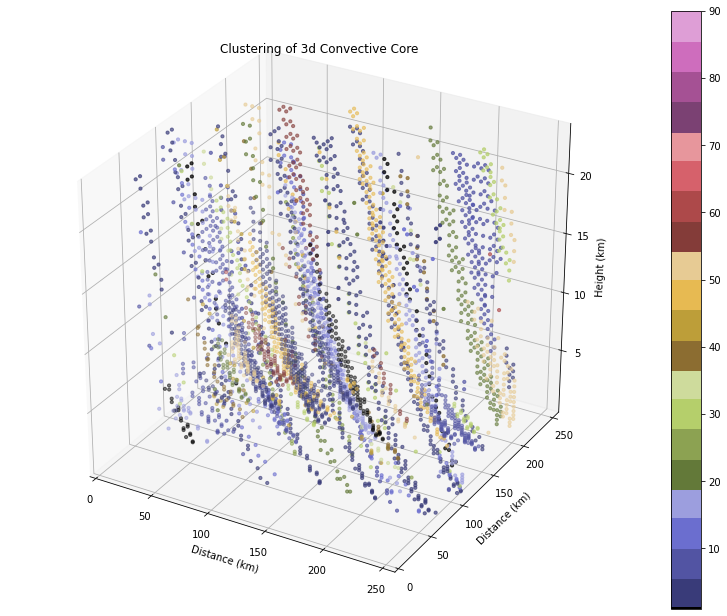

In [ ]:
#meshgrid for x-y-z 3D graph
x3d, y3d, z3d = np.meshgrid(xdir, ydir, height) 
fig = plt.figure(figsize=(14,11))
ax = fig.add_subplot(111, projection='3d')

#Sets limits and lables for x,y,z axis
ax.set_title('Clustering of 3d Convective Core')
ax.set_xlim(xdir[0],xdir[-1])
ax.set_ylim(ydir[0],ydir[-1])
ax.set_zlim(height[0],height[-1])
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Distance (km)')
ax.set_zlabel('Height (km)')

#Creates custom colormap to display value 0 as black
viridis = cm.get_cmap('tab20b', 256)
newcolors = viridis(np.linspace(0, 1, 256))
black = np.array([0/256, 0/256, 0/256, 1])
newcolors[:1, :] = black
newcmp = ListedColormap(newcolors)

#Used for size paramter
alphaVals = np.copy(labels_test_3d)

#Sets each value in array
alphaVals[alphaVals!=0]=10
alphaVals[alphaVals==0]=0

#Sets view and plots normal view graph
ax.azim = -60
ax.dist = 10
ax.elev = 30

p = ax.scatter(x3d, y3d, z3d, c = labels_test_3d, s=alphaVals, vmin=1, vmax=90, cmap=newcmp)
fig.colorbar(p)

fig.show()

#**4D Labeling**


In this objective, we will focus on segmenting and labelling the "w_4D" array however this time in 4 dimensions. This array will still be labelled using the SciPy package and its label function but this time include time as well as x, y, and z when labelling cores. This will allow us to track individual convective cores throughout time and study how they change. Again the individual cores will be represented through the use of a customized colormap. 

In [ ]:
copy_4d = np.copy(w_4d)
#makes a copy of w_4d
threshold = w_4d[: ,: ,: , :]

threshold=np.where(threshold>10,1,0)
struct = np.ones((3, 3, 3, 3), dtype=bool)

#Labeling 
labels_test_4d, num_features_4d = label(threshold,struct)
print(num_features_4d)

310


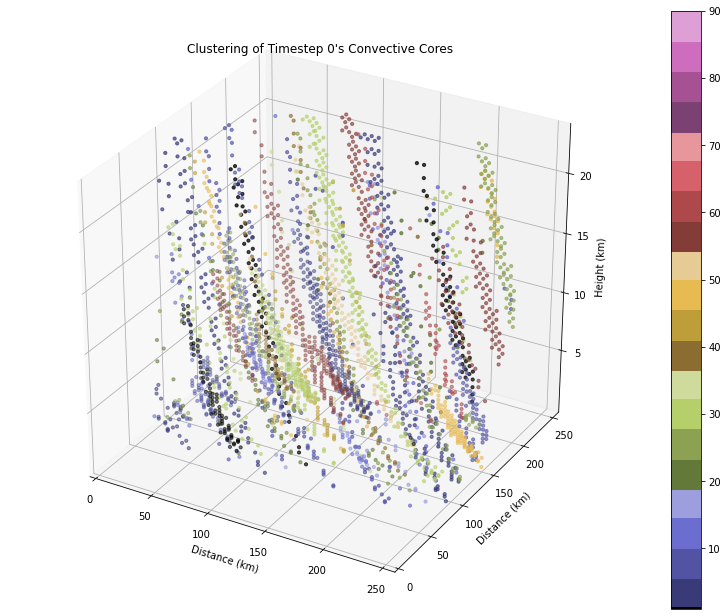

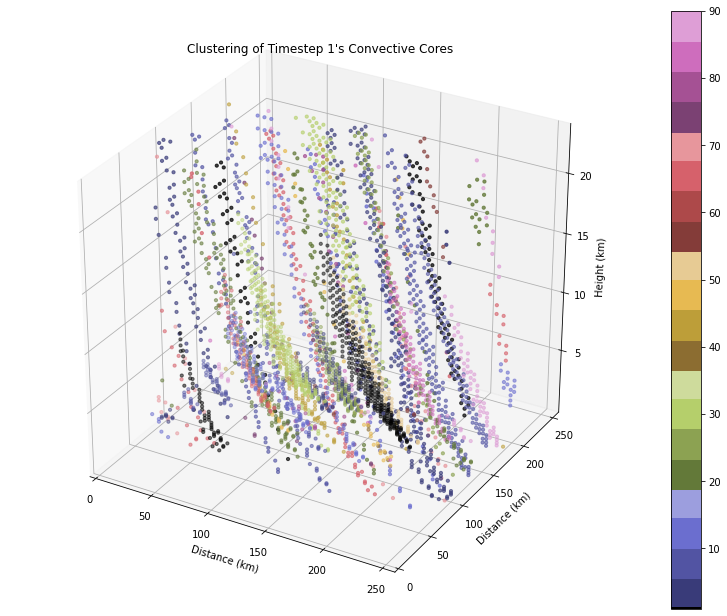

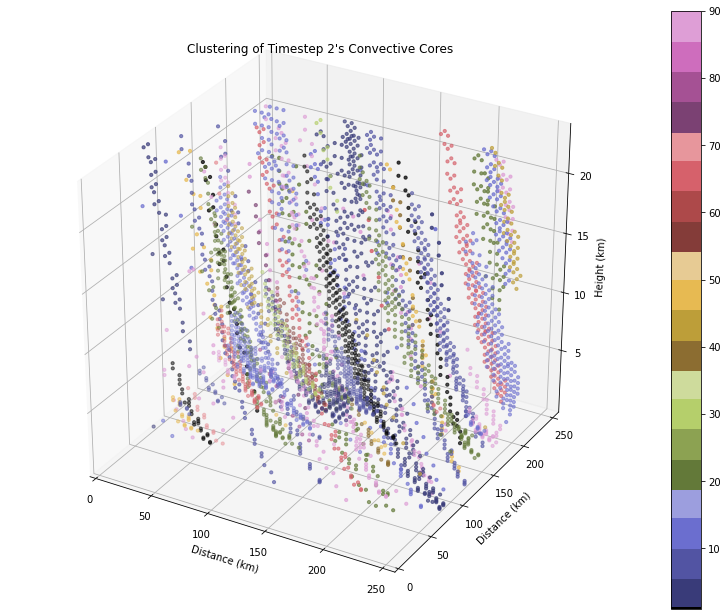

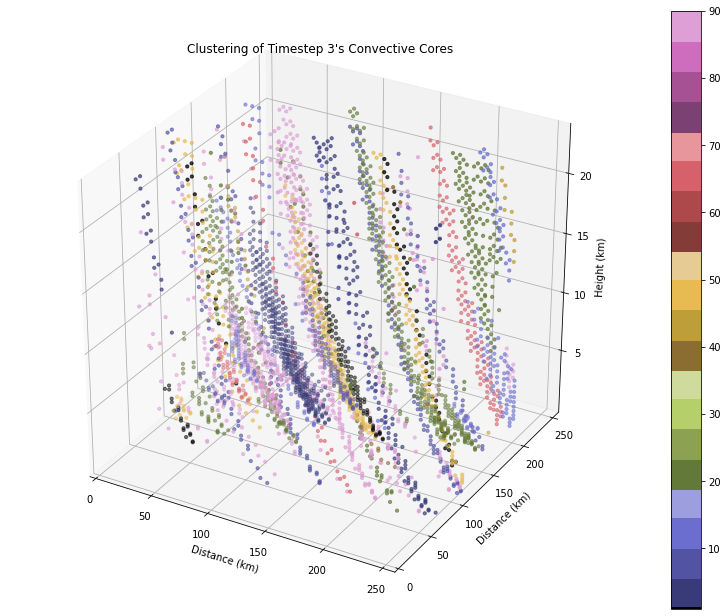

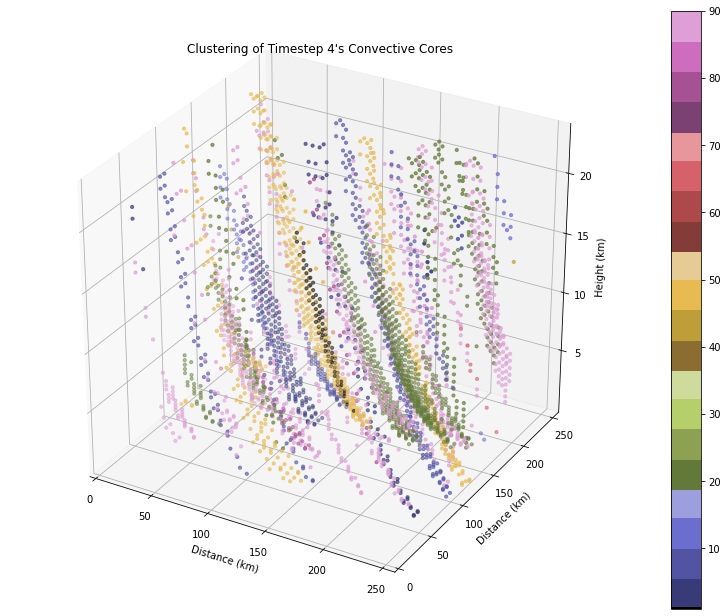

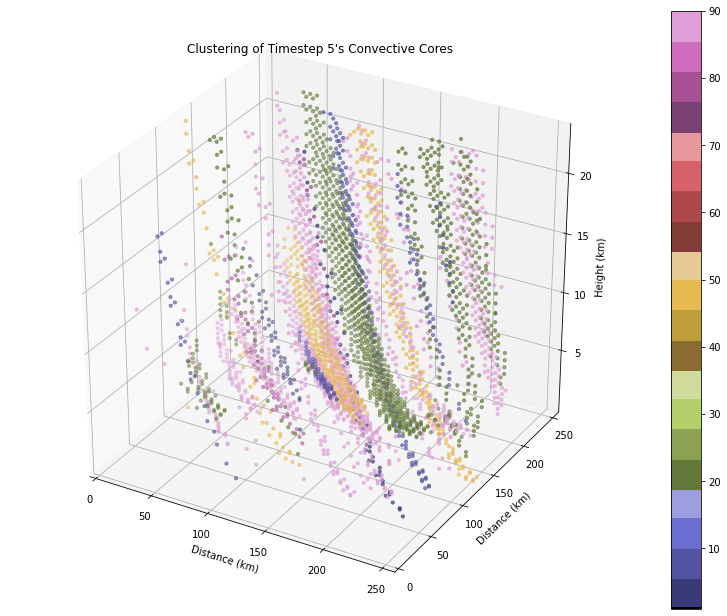

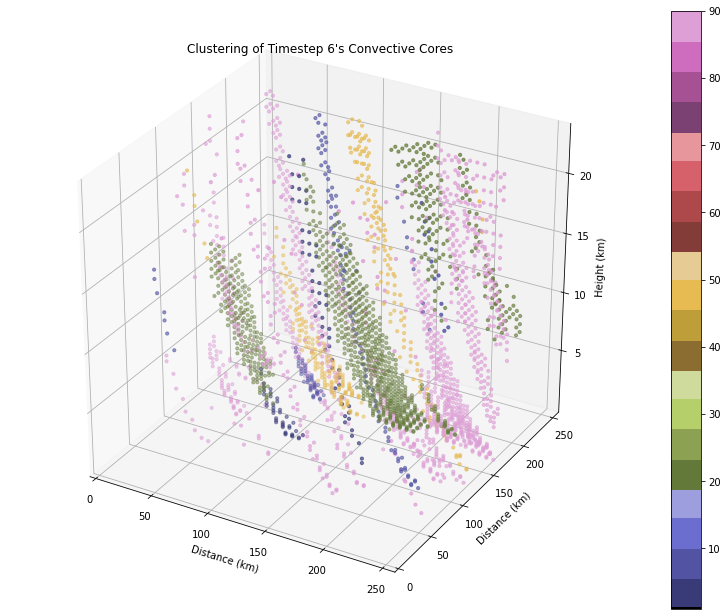

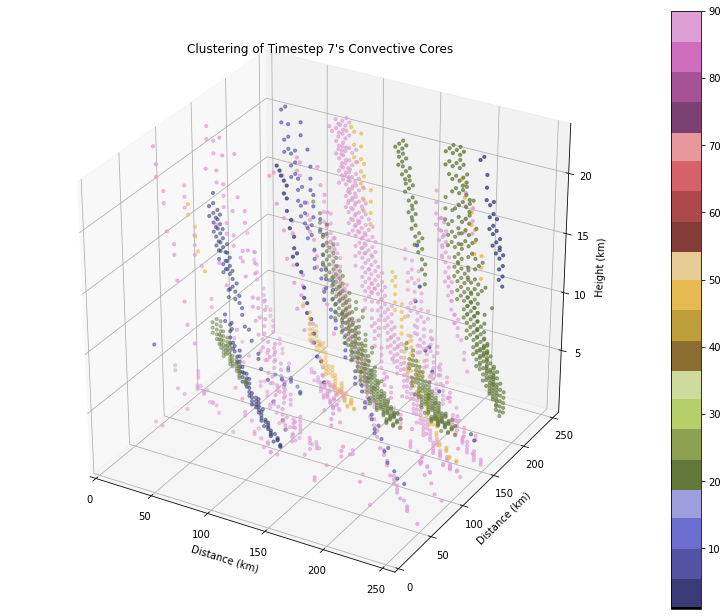

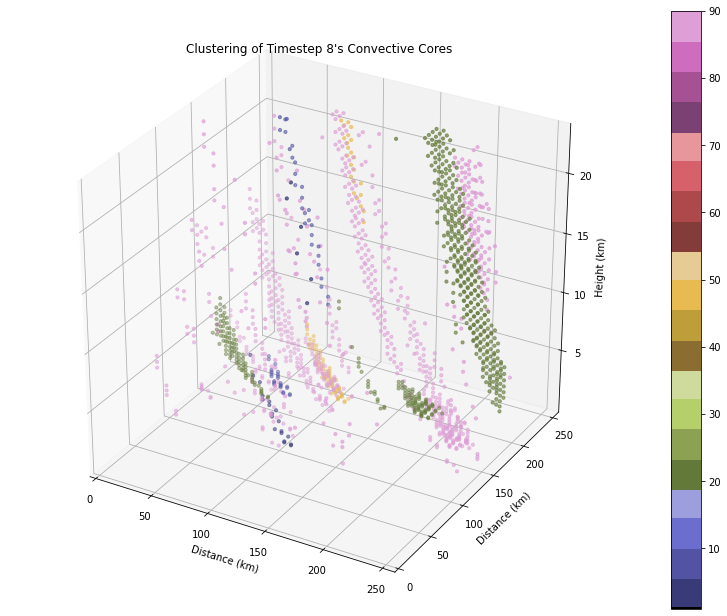

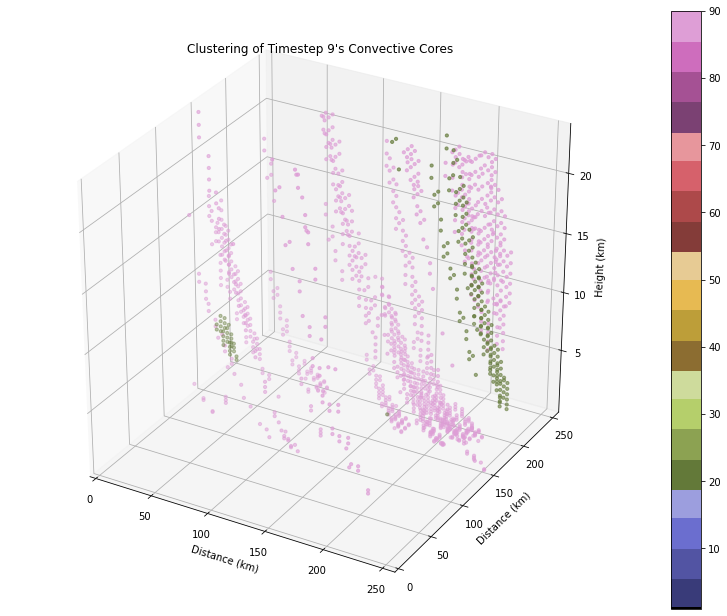

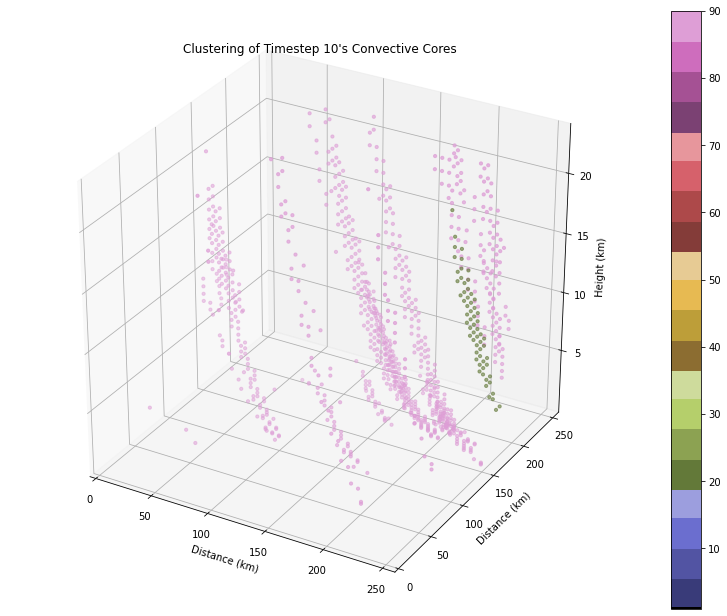

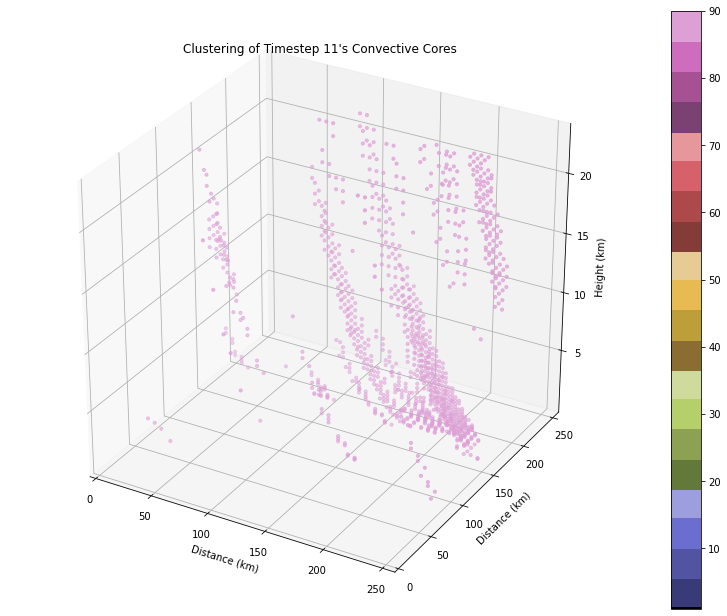

In [ ]:
for idx in range(12):
  #meshgrid for x-y-z 3D graph
  x3d, y3d, z3d = np.meshgrid(xdir, ydir, height) 
  fig = plt.figure(figsize=(14,11))
  ax = fig.add_subplot(111, projection='3d')

  #Sets limits and lables for x,y,z axis
  ax.set_title('Clustering of Timestep '+str(idx)+"'s Convective Cores")
  ax.set_xlim(xdir[0],xdir[-1])
  ax.set_ylim(ydir[0],ydir[-1])
  ax.set_zlim(height[0],height[-1])
  ax.set_xlabel('Distance (km)')
  ax.set_ylabel('Distance (km)')
  ax.set_zlabel('Height (km)')

  #Creates custom colormap to display value 0 as black
  viridis = cm.get_cmap('tab20b', 256)
  newcolors = viridis(np.linspace(0, 1, 256))
  black = np.array([0/256, 0/256, 0/256, 1])
  newcolors[:1, :] = black
  newcmp = ListedColormap(newcolors)


  #Used for size paramter
  alphaVals = np.copy(labels_test_4d[idx,:,:,:])
  #Sets each value in array
  alphaVals[alphaVals!=0]=10
  alphaVals[alphaVals==0]=0


  #Sets view and plots normal view graph
  ax.azim = -60
  ax.dist = 10
  ax.elev = 30
  p = ax.scatter(x3d, y3d, z3d, c = labels_test_4d[idx,:,:,:], s=alphaVals, vmin=1, vmax=90, cmap=newcmp)
  fig.colorbar(p)

  fig.show()

#**Extracting Statistics For Cores**

In this objective we are extracting statistics from the convective cores because they are now tracked through time in a three-dimensional space. 
The variables extracted include:

*   Maximum velocity for each core in a given timestep
*   Volume of each core in a given timestep
*   Number of cores present in each timestep

In [ ]:
#Finding Max Velocities for each core over time
dict_max_velo={}
for x in range(1,13):
  num_core = np.amax(labels_test_4d[x-1,:,:,:])
  list_max_velo=[]
  coords=find_objects(labels_test_4d,num_core)
  for y in range(1,num_core+1):
    a=str(coords[y-1][0])
    list_time=a.split()
    if x >= int(''.join(filter(str.isdigit, list_time[0]))) and x < int(''.join(filter(str.isdigit, list_time[1]))):
      var=np.amax(w_4d[x-1,coords[y-1][1],coords[y-1][2],coords[y-1][3]])
      if var>10:
        list_max_velo.append(var)
  dict_max_velo[str(x)]=list_max_velo

print(dict_max_velo)

{'1': [22.7200870513916, 26.888113021850586, 15.42912483215332, 14.410259246826172, 14.968140602111816, 16.671733856201172, 12.872289657592773, 13.468889236450195, 10.631938934326172, 13.31558609008789, 21.5598087310791, 12.525774002075195, 14.443333625793457, 25.30219268798828, 13.32461166381836, 11.046773910522461, 14.682923316955566, 11.485611915588379, 13.469995498657227, 13.538456916809082, 19.426414489746094, 13.098211288452148], '2': [26.203163146972656, 21.824323654174805, 16.873798370361328, 18.87566375732422, 18.186870574951172, 14.688055038452148, 19.720006942749023, 16.180339813232422, 17.836734771728516, 21.6439151763916, 22.310819625854492, 10.892620086669922, 14.628173828125, 13.716665267944336, 13.428814888000488, 11.1120023727417, 19.51817512512207, 11.954479217529297, 12.729377746582031, 10.558775901794434, 12.297324180603027], '3': [23.039451599121094, 18.673622131347656, 18.60984992980957, 24.393007278442383, 17.824779510498047, 26.832683563232422, 23.63178443908691

In [ ]:
#Finding Volume for each core over time
dict_vol={}
for x in range(1,13):
  num_core = np.amax(labels_test_4d[x-1,:,:,:])
  vol_list=[]
  coords=find_objects(labels_test_4d,num_core)
  for y in range(1,num_core+1):
    a=str(coords[y-1][0])
    list_time=a.split()
    if x >= int(''.join(filter(str.isdigit, list_time[0]))) and x < int(''.join(filter(str.isdigit, list_time[1]))):
      a=np.where(w_4d[x-1,coords[y-1][1],coords[y-1][2],coords[y-1][3]] >10,1,0)
      vol=np.count_nonzero(a==1)
      vol_list.append(vol)
  dict_vol[str(x)]=vol_list

print(dict_vol)

{'1': [189, 330, 42, 45, 164, 133, 51, 81, 4, 20, 247, 65, 26, 407, 84, 16, 41, 6, 37, 78, 110, 32], '2': [435, 300, 146, 204, 200, 62, 234, 80, 269, 181, 371, 6, 97, 29, 81, 9, 178, 5, 12, 7, 11], '3': [286, 325, 175, 310, 199, 371, 245, 473, 34, 116, 199, 52, 275, 11, 14, 81, 13], '4': [170, 389, 269, 131, 127, 721, 30, 386, 187, 8, 219, 11, 23, 23], '5': [276, 281, 85, 1051, 656, 48, 254, 171, 104, 2, 64, 18, 41, 55], '6': [101, 270, 45, 1313, 525, 252, 331, 175, 45, 138, 15, 20], '7': [93, 163, 1045, 322, 250, 67, 43, 12, 216, 14], '8': [209, 115, 760, 211, 243, 82, 3, 28, 35, 90, 142], '9': [540, 187, 93, 44, 26, 144, 12, 27], '10': [289, 86, 174, 140, 87, 87, 100, 179], '11': [112, 188, 173, 25, 198], '12': []}


In [ ]:
#Finding # Of Cores Present in Each Time Step
list_cores=[]
for x in range(1,13):
  num_core=np.unique(labels_test_4d[x-1,:,:,:])
  list_cores.append(len(num_core)-1)

print(list_cores)

[63, 49, 48, 53, 46, 35, 38, 29, 35, 23, 18, 15]


# **Graphing Statistics**

In the final objective we will be using the above extracted statistics to provide visuals of the convective core dataset! The graphs will use the matplotlib library in order to create bar,line, and box & whisker plots.

Graphs Include:
*   Vertical Box and Whisker Plot -- Maximum Velocity of Each Core Throughout Time
*   Vertical Box and Whisket Plot -- Volume of Each Core Throughout Time
*   Line Graph -- Median Maximum Velocity of Cores in Each Timestep
*   Line Graph -- Median Volume of Core Per Timestep
*   Double Line Graph -- Maximum Convective Core Volume & Velocity Over Time
*   Bar Graph -- Number of Convective Cores in Each Timestep








/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


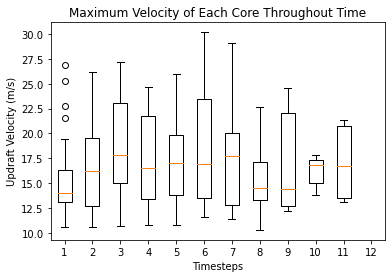

In [ ]:
labels, data = [*zip(*dict_max_velo.items())]  # 'transpose' items to parallel key, value lists
labels, data = dict_max_velo.keys(), dict_max_velo.values()

plt.title("Maximum Velocity of Each Core Throughout Time")
plt.xlabel("Timesteps")
plt.ylabel("Updraft Velocity (m/s)")
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


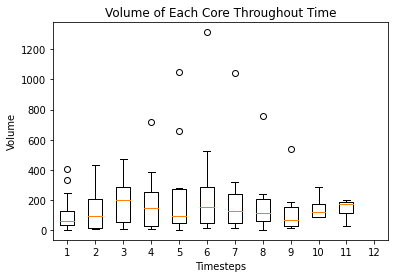

In [ ]:
labels, data = [*zip(*dict_vol.items())]  # 'transpose' items to parallel key, value lists
labels, data = dict_vol.keys(), dict_vol.values()

plt.title("Volume of Each Core Throughout Time")
plt.ylabel("Volume")
plt.xlabel("Timesteps")
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

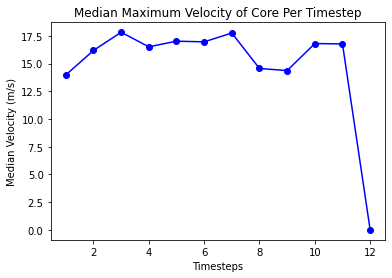

In [ ]:
#Get max of Vol and Velo
list_velo=[]
for x in range(1,13):
  if x!=12:
    list_velo.append(np.median(dict_max_velo[str(x)]))
  else:
    list_velo.append(0)

timestep=[1,2,3,4,5,6,7,8,9,10,11,12]

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax.plot(timestep, list_velo, color="blue", marker="o")
plt.title('Median Maximum Velocity of Core Per Timestep')
plt.xlabel('Timesteps')
plt.ylabel('Median Velocity (m/s)')
plt.show()

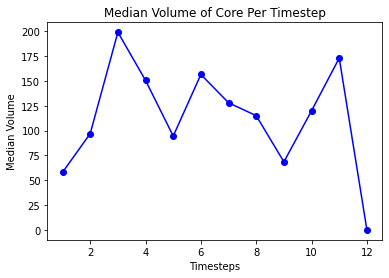

In [ ]:
#Get max of Vol and Velo
list_vol=[]
for x in range(1,13):
  if x!=12:
    list_vol.append(np.median(dict_vol[str(x)]))
  else:
    list_vol.append(0)

timestep=[1,2,3,4,5,6,7,8,9,10,11,12]

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax.plot(timestep, list_vol, color="blue", marker="o")
plt.title('Median Volume of Core Per Timestep')
plt.xlabel('Timesteps')
plt.ylabel('Median Volume')
plt.show()

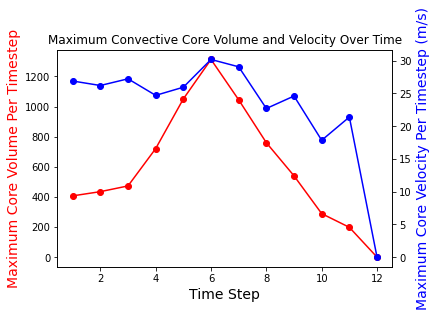

In [ ]:
#Get max of Vol and Velo
list_vol=[]
list_velo=[]
for x in range(1,13):
  if x!=12:
    list_velo.append(np.amax(dict_max_velo[str(x)]))
  else:
    list_velo.append(0)

for x in range(1,13):
  if x!=12:
    list_vol.append(np.amax(dict_vol[str(x)]))
  else:
    list_vol.append(0)

timestep=[1,2,3,4,5,6,7,8,9,10,11,12]


# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(timestep, list_vol, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Time Step",fontsize=14)
# set y-axis label
ax.set_ylabel("Maximum Core Volume Per Timestep",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(timestep, list_velo,color="blue",marker="o")
ax2.set_ylabel("Maximum Core Velocity Per Timestep (m/s)",color="blue",fontsize=14)
ax2.set_title("Maximum Convective Core Volume and Velocity Over Time")
plt.show()

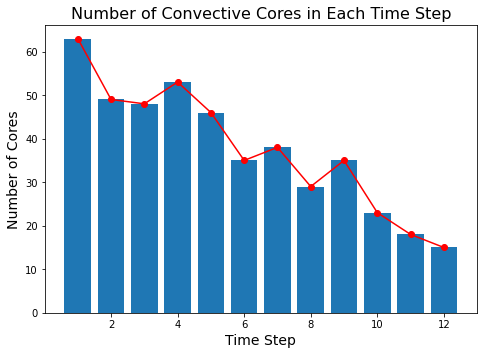

In [ ]:
# # of cores present for each time step
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(timestep,list_cores)
ax.plot(timestep,list_cores,color="red", marker="o")
plt.title("Number of Convective Cores in Each Time Step",fontsize=16)
plt.xlabel("Time Step",fontsize=14)
plt.ylabel("Number of Cores",fontsize=14)

plt.show()

# Conclusions
This project was a major stepping stone for the convective core research in the FIRE Cloud Computing Stream. Being able to identify and track convective cores throughout time and the x, y, and z axes have allowed us to gain an understanding of how clouds and their vertical updrafts develop. These statistics also answered many questions for us that will be important in future research. We learned that the first timestep contains the most cores however the 6th timestep has the highest tracked velocity and volume within a core. It is important to know this because it can help to determine which timestep is the best to visualize depending on what information is trying to be conveyed. We also learned that as time passes there are fewer convective cores present in our dataset. Being able to answer these questions gives us insight as to how convective cores within clouds develop over the lifecycle of a cloud. While much was answered with this research there is still a lot that is unknown.



#Future Work

Despite the amount of work done with the convective cores dataset this semester, there is still a lot of questions that were left unanswered that can be solved in future semesters.
 
There were some issues with the current way of labeling cores through the use of the SciPy labeling function. The first issue is that some labeled cores contain multiple cores within them. For example, if you were to display just Core #10 it would display 2 cores instead of just one. This can impact lots of statistics drawn from the data and might be something useful to investigate in the future.
 
Another area that should be explored is finding the top height and bottom height of each core. This is able to be done however it was too difficult and time-intensive for us to finish this semester. But this information can provide useful visualizations of the dataset and allow us to recreate visualizations on this dataset done by colleagues outside our stream.
 
Lastly, it would be interesting to use our new understanding of how convective cores develop over time using thresholding techniques and compare them with how convective cores develop over time using water-shedding. This could help us draw conclusions about which technique is better and how each method affects the dataset. We could also compare statistics of the average core for each method. For example, finding the average lifespan, velocity, or size of a core using water-shedding vs thresholding.
 
There are still many potential paths that could be taken with this dataset in our FIRE Cloud Computing Stream by future stream members!

